In [1]:
#Getting basic info about the file

import pandas as pd
import requests

df = pd.read_csv("dfc_facility_raw.csv")
df.shape
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7556 entries, 0 to 7555
Columns: 142 entries, CMS Certification Number (CCN) to Percentage of pediatric HD patients with nPCR
dtypes: float64(76), int64(27), object(39)
memory usage: 8.2+ MB


CMS Certification Number (CCN)                                   int64
Network                                                          int64
Facility Name                                                   object
Five Star Date                                                  object
Five Star                                                      float64
                                                                ...   
Percentage of Adult patients with long term catheter in use    float64
nPCR Data Availability Code                                      int64
Number of patients in nPCR summary                             float64
Number of patient-months in nPCR summary                       float64
Percentage of pediatric HD patients with nPCR                  float64
Length: 142, dtype: object

In [2]:
#how are missing data in star ratings listed?
df["Five Star"].head(10)

#let's do some stats on the star ratings
df.value_counts(['Five Star'])
df.value_counts(['Five Star'], normalize=True)

# Count number of clinics for each star rating
rating_counts = df['Five Star'].value_counts().sort_index().reset_index()
rating_counts.columns = ['Five Star Rating', 'Number of Clinics']

# Optional: add percentage column (for labeling in Datawrapper or reference)
rating_counts['Percentage'] = (rating_counts['Number of Clinics'] / rating_counts['Number of Clinics'].sum()) * 100

# Export to CSV
rating_counts.to_csv("star_rating_distribution.csv", index=False)

## Time to rename a bunch of shit

In [3]:
df.rename(columns={"# of Dialysis Stations": "station_num"}, inplace=True)


In [4]:
df['station_num'].head(10)

0     7
1    28
2    24
3    23
4    19
5    27
6    24
7    16
8    26
9    19
Name: station_num, dtype: int64

In [5]:
#Make all column headers lower case because I don't do these fancy capital letters
df.columns = df.columns.str.lower()

In [6]:
#Converting facility names to all lowercase
df["facility name"] = df["facility name"].str.lower()
df["facility name"] = df["facility name"].str.replace(r"\s*-\s*", " ", regex=True)
df["facility name"].head(10)

0              childrens hospital dialysis
1                         fmc capitol city
2                  davita gadsden dialysis
3    davita tuscaloosa university dialysis
4                    davita pdi montgomery
5                   davita dothan dialysis
6                               fmc mobile
7          davita birmingham east dialysis
8                                fmc selma
9                             bma langdale
Name: facility name, dtype: object

# Getting some descriptive statistics

In [7]:
df["station_num"].describe()

count    7556.000000
mean       17.630360
std         8.666408
min         0.000000
25%        12.000000
50%        17.000000
75%        23.000000
max        80.000000
Name: station_num, dtype: float64

In [8]:
df["station_quartile"] = pd.qcut(df["station_num"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
quartiles = pd.qcut(df["station_num"], q=4)
print(quartiles.unique())

[(-0.001, 12.0], (23.0, 80.0], (17.0, 23.0], (12.0, 17.0]]
Categories (4, interval[float64, right]): [(-0.001, 12.0] < (12.0, 17.0] < (17.0, 23.0] < (23.0, 80.0]]


In [9]:
df.groupby('station_quartile')['five star'].mean()

# Create quartile labels
df["station_quartile"] = pd.qcut(df["station_num"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Group by quartile and get average five-star rating
quartile_summary = df.groupby("station_quartile")["five star"].mean().reset_index()

# Rename columns for clarity in Datawrapper
quartile_summary.columns = ["Clinic Size Quartile", "Average Five-Star Rating"]

# Save to CSV for Datawrapper
quartile_summary.to_csv("clinic_quartile_ratings.csv", index=False)

C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_16504\2869341715.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('station_quartile')['five star'].mean()
C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_16504\2869341715.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_summary = df.groupby("station_quartile")["five star"].mean().reset_index()


C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_46368\4105986930.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('station_quartile')['five star'].mean().plot(x='name', y='length')


Text(0, 0.5, 'Average Star Rating')

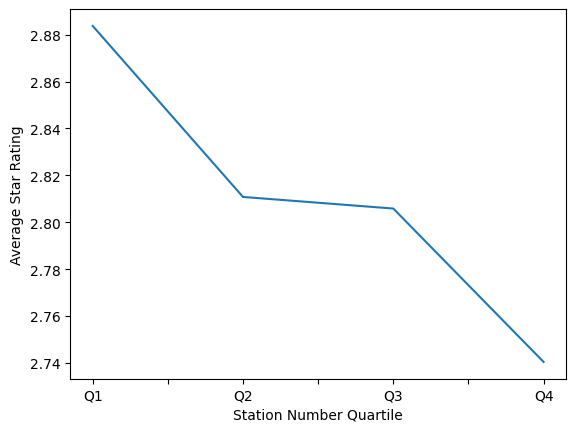

In [10]:
#Let's graph this bad boy
import matplotlib.pyplot as plt

df.groupby('station_quartile')['five star'].mean().plot(x='name', y='length')
plt.xlabel("Station Number Quartile")
plt.ylabel("Average Star Rating")

In [11]:
import pandas as pd
import requests

foia = pd.read_excel("foia_ivd.xlsx")
foia.shape
foia.dtypes

run_dt               datetime64[ns]
age                           int64
race_type_desc               object
gndr_txt                     object
ethncty_type_desc            object
dschrg_monyyyy               object
ntwrk_ivd                     int64
org_name_ivd                 object
days_to_next                float64
next_admit_ccn               object
status                       object
death_monyyyy                object
row_num                       int64
dtype: object

In [12]:
# convert all cells to lowercase because I hate remembering what's what
foia["org_name_ivd"] = foia["org_name_ivd"].str.lower()
foia["org_name_ivd"].head(10)

0    liberty dialysis college station
1           shoreline dialysis center
2                      fmc lafollette
3                    fmc - louisville
4       davita willow dialysis center
5                laplace dialysis ctr
6                  sugarland dialysis
7        davita westport renal center
8    zz-closed-fmc fairmount dialysis
9    zz-closed-fmc fairmount dialysis
Name: org_name_ivd, dtype: object

In [13]:
#strip "zz-closed-" from org_name_ivd column
foia["org_name_ivd"] = foia["org_name_ivd"].str.replace(r"^zz-closed-", "", regex=True)
#strip extra spaces and dashes from this column
foia["org_name_ivd"] = foia["org_name_ivd"].str.replace(r"\s*-\s*", " ", regex=True)
foia["org_name_ivd"].head(10)

0    liberty dialysis college station
1           shoreline dialysis center
2                      fmc lafollette
3                      fmc louisville
4       davita willow dialysis center
5                laplace dialysis ctr
6                  sugarland dialysis
7        davita westport renal center
8              fmc fairmount dialysis
9              fmc fairmount dialysis
Name: org_name_ivd, dtype: object

In [14]:
#now the naming style of "facility name" will match "org_name_ivd"

In [15]:
#create new variable "ivd_facility" if "org_name_ivd" matches an entry in "facility name"
df["ivd_facility"] = df["facility name"].isin(foia["org_name_ivd"]).map({True: "yes", False: "no"})
df["ivd_facility"].head(10)

0     no
1    yes
2    yes
3     no
4     no
5     no
6    yes
7    yes
8     no
9    yes
Name: ivd_facility, dtype: object

In [16]:
df["ivd_facility"].value_counts()

ivd_facility
no     5509
yes    2047
Name: count, dtype: int64